**Name:** Greeshma Hedvikar

**Net ID:** gh2461

**Assignment:** 03

<ipython-input-10-0c66fad884fb>:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


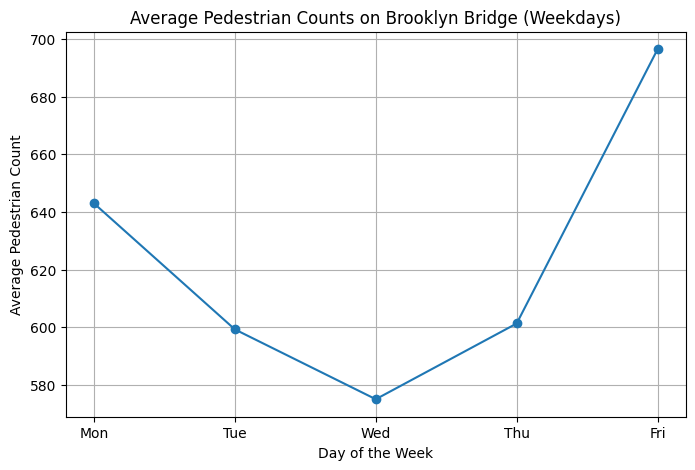

In [ ]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# dataset
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

# Columns
df.columns = df.columns.str.strip()


# Step 1: Plot Weekday Pedestrian Counts

# Convert to datetime
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

# Add 'Weekday' column (0 = Monday, ..., 6 = Sunday)
df['Weekday'] = df['hour_beginning'].dt.weekday

# Filter for weekdays (Monday to Friday)
weekday_df = df[df['Weekday'] < 5]

# Average Pedestrian Counts by Weekday
weekday_avg = weekday_df.groupby('Weekday')['Pedestrians'].mean()

# Plot
plt.figure(figsize=(8, 5))
plt.plot(['Mon', 'Tue', 'Wed', 'Thu', 'Fri'], weekday_avg, marker='o')
plt.title('Average Pedestrian Counts on Brooklyn Bridge (Weekdays)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Pedestrian Count')
plt.grid(True)
plt.show()


Correlation of Weather Categories with Pedestrian Counts:
Pedestrians                    1.000000
weather_partly-cloudy-day      0.497867
weather_clear-day              0.339758
weather_wind                  -0.000170
weather_sleet                 -0.017091
weather_fog                   -0.026457
weather_snow                  -0.034052
weather_cloudy                -0.081255
weather_rain                  -0.138581
weather_partly-cloudy-night   -0.282081
weather_clear-night           -0.377297
Name: Pedestrians, dtype: float64


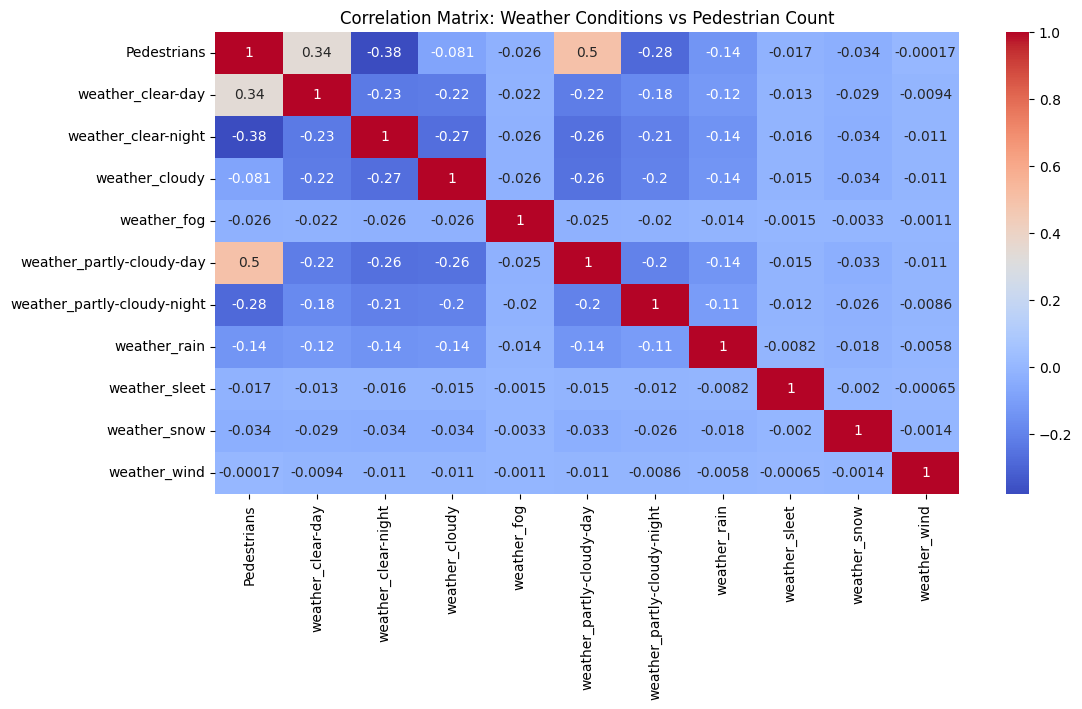

In [ ]:
# Step 2: Correlation of Weather & Pedestrian Counts (2019)

# Filter data for 2019
df_2019 = df[df['hour_beginning'].dt.year == 2019]

# One-hot encode the 'weather_summary' column
weather_encoded = pd.get_dummies(df_2019['weather_summary'], prefix='weather')

# Combine encoded weather with the original DataFrame
df_2019_encoded = pd.concat([df_2019, weather_encoded], axis=1)

# Create a correlation matrix
corr_matrix = df_2019_encoded[['Pedestrians'] + list(weather_encoded.columns)].corr()

# Print correlation values with 'Pedestrians'
print("\nCorrelation of Weather Categories with Pedestrian Counts:")
print(corr_matrix['Pedestrians'].sort_values(ascending=False))

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Weather Conditions vs Pedestrian Count')
plt.show()

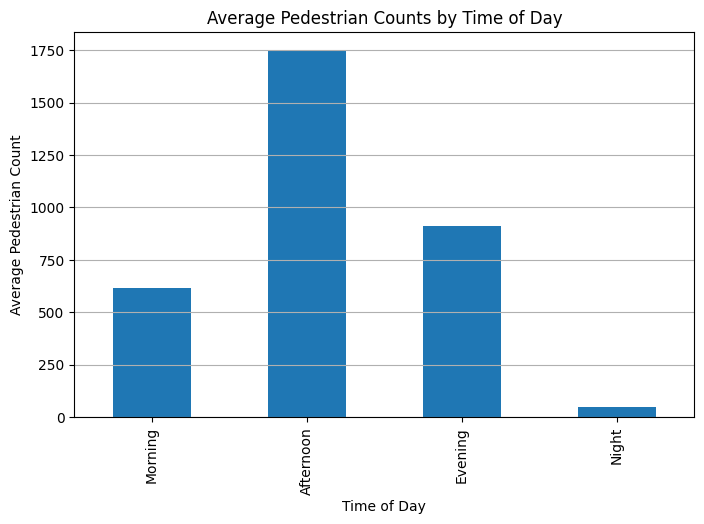

In [ ]:
# Step 3: Categorize Time of Day

# Extract hour from timestamp
df['Hour'] = df['hour_beginning'].dt.hour

# Define custom function to categorize time of day
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply time categorization
df['Time of Day'] = df['Hour'].apply(categorize_time)

# Group by Time of Day and calculate average pedestrian counts
time_avg = df.groupby('Time of Day')['Pedestrians'].mean().reindex(['Morning', 'Afternoon', 'Evening', 'Night'])

# Plot
plt.figure(figsize=(8, 5))
time_avg.plot(kind='bar')
plt.title('Average Pedestrian Counts by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Pedestrian Count')
plt.grid(axis='y')
plt.show()